<h1> Deconstructing Stats </h1>

<h2> Covariance </h2>

<h3>short covariance from scratch </h3>

In [3]:
import numpy as np
from numpy import mean, std, var
#economic grouth x
x = np.array([2.1, 2.5,4.0,3.6])

#y SnP
y= np.array([8,12,14,10])

n = len(x)

\begin{equation} \frac{ \sum{(x -  \hat{x}} ) (y - \hat{y} } {N-1}                \end{equation}

In [20]:
print("sum of product of x,y differences from mean: {:0.2f} ".format( sum( (x - mean(x)) * (y - mean(y)))))
print("n-1: {:}".format(n-1))
covar=      sum( (x - mean(x)) * (y - mean(y))) / (n-1)
covar

sum of product of x,y differences from mean: 4.60 
n-1: 3


1.5333333333333332

In [10]:
print(np.cov(x,y))
np.cov(x,y)[1,0]

[[0.80333333 1.53333333]
 [1.53333333 6.66666667]]


1.5333333333333332

In [24]:
xStd= x.std(ddof=1) # degrees of freedom 1 / divisor is N - 1 for sample
yStd= std(y, ddof=1)

<p> <span style="color:purple"> write the covariance `covar1` formula from scratch for A and B   </span>

In [3]:
A = np.array([4,5,6,6,7])
B = np.array([30,34,33,37,37])

2.85

In [25]:
covar1=      sum((A - mean(A)) * (B - mean(B))) / (len(A)-1)
print(covar1)
np.cov(A,B)

2.85


array([[1.3 , 2.85],
       [2.85, 8.7 ]])

In [12]:
np.cov(A,B)[1,0]

2.85

<h2> Correlation </h2>

In [15]:
#cont cnt cont
xStd = np.std(x)
yStd=np.std(y)
r = covar / (xStd * yStd) # or covar / math.sqrt(xVar *yVar)
r

0.8834318429373718

In [16]:
r

0.8834318429373718

In [17]:
#numpy correlation
np.corrcoef(x,y)
np.corrcoef(x,y)[1,0]

0.662573882203029

<p> <span style="color:purple"> given x and y compute `r1` correlation from scratch </span>

In [46]:
x = np.array([2.1, 2.5,4.0,3.6])
#y SnP
y= np.array([8,12,14,10])
n = len(x)


`np.std(x , ddof=1)` standard dev of a population

In [18]:
xStd = np.std(x, ddof=1)
yStd=np.std(y, ddof=1)
covar=      sum( (x - mean(x)) * (y - mean(y)) ) / (n-1)
r1 = covar / (xStd*yStd)
r1


0.662573882203029

<h2> the Art of Sampling </h2>

<h3> basic sampling with numpy </h3>

In [19]:
import numpy as np
popul = ['a','b','c', 'd','e']

`np.random.choice(population, _SampleSize_ , replace=T/F)`

In [20]:
sample = np.random.choice(popul, 2, replace=False)
print (sample)

['c' 'd']


In [21]:
popul2=[x for x in range(0,1000)]
sample2 =np.random.choice(popul2,10, replace =False)
sample2

array([134,  17, 527, 916, 664, 752, 794, 954, 156, 777])

<p> <span style="color:purple">sample 3 members of the population in sample 3 </span>

In [24]:
popul3=[x for x in range(10,101,10)]
popul3

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [42]:
sample3=np.random.choice(popul3,3,replace=False)
sample3

array([ 40,  70, 100])

<h2>Generate synthetic data </h2>

In [44]:
import scipy.stats as stats

`scipy.stats.norm(mean, std).rvs((numR, numC))` specify mean and std

In [47]:
stats.norm(0,1).rvs((5,2))
stats.norm(1,1).rvs((5,2))

array([[ 1.6483856 ,  2.28699578],
       [ 1.10341302,  0.58396793],
       [ 0.02835833,  0.04465155],
       [ 1.53333631,  0.01401718],
       [-0.17383024,  2.04053604]])

`concatenate( (array1, array2 ), axis=num)`

In [49]:
np.concatenate( (stats.norm(0,1).rvs((5,2)),( stats.norm(1,1).rvs((5,2)) ) ), axis=0 )

array([[-0.1670011 ,  0.11660409],
       [ 1.02763432,  0.518221  ],
       [-1.40425064, -0.62663131],
       [ 0.27802211,  0.63060031],
       [ 0.25551841, -0.69215593],
       [ 1.59001177,  0.68830997],
       [ 0.66269796, -1.15140945],
       [ 1.75057487,  1.98394389],
       [-0.2859952 ,  0.48134399],
       [ 1.53256354,  1.24876878]])

In [43]:
def generate_synth_data(n=50):
    '''create two sets of point for bivariate distribution , n repetitions'''
    points = np.concatenate( ( ss.norm(0,1).rvs((n,2)),( ss.norm(1,1).rvs((n,2)) ) ), axis=0 )
    outcomes = np.concatenate( ( np.repeat(0,n), np.repeat(1,n) ) )
    return  (points, outcomes)

In [41]:
n=5
(points, outcomes) =generate_synth_data(n)
print(points)
print(outcomes)


[[ 1.79655366  0.08271133]
 [ 0.95361496  0.14435663]
 [-0.90155403  0.40565925]
 [ 0.35206849 -0.50410612]
 [-1.14631677  0.05272889]
 [ 0.09165596  0.22214894]
 [ 1.95353155  2.31226145]
 [ 1.18704607  1.30164688]
 [ 1.91089556 -0.10389737]
 [ 0.65385275  0.68314432]]
[0 0 0 0 0 1 1 1 1 1]


<h4>plotting </h4>

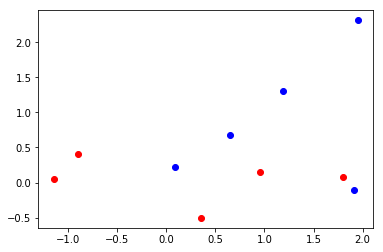

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(points[:n,0], points[:n,1], 'ro')
plt.plot(points[n:,0], points[n:,1], 'bo')
plt.savefig("bivardata.pdf")

<p> <span style="color:purple">generate a group1 (10*2) array of mean,std=5,2 and another of 7.1.5  </span>

In [54]:
group1 = stats.norm(5,2).rvs(10,2)
group2 = stats.norm(7,1.5).rvs(10,2)
group2

array([6.37486323, 6.91559976, 3.79570586, 9.46040621, 4.30984662,
       5.73737895, 7.75432213, 5.13206787, 5.41307167, 5.63648858])